# Prostate Cell Classification

### Rizky Nurhidayat | 13/06/2024

### Library

In [1]:
# Library

import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Feature Extraction

In [2]:
# Function for feature extraction

# Function for GLCM feature extraction
def extract_glcm_features(image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
    glcm = graycomatrix(image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
    features = []
    properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
    for prop in properties:
        for angle in range(len(angles)):
            features.append(graycoprops(glcm, prop)[0, angle])
    return features

# Function for Hu Moments feature extraction
def extract_hu_moments(image):
    moments = cv2.moments(image)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

In [3]:
# Function for loading and processing images

def process_images(directory, label):
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            filepath = os.path.join(directory, filename)
            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

            # GLCM feature extraction
            glcm_features = extract_glcm_features(image)

            # Hu Moments feature extraction
            hu_moments = extract_hu_moments(image)

            # Combine features and add labels
            features = glcm_features + hu_moments.tolist() + [label]
            data.append(features)

In [4]:
# Loading and processing images

# Path to image folder
normal_dir = 'Normal'
abnormal_dir = 'Abnormal'

# List to store feature extraction results
data = []

# Normal and abnormal image processing
process_images(normal_dir, 'normal')
process_images(abnormal_dir, 'abnormal')

# Define column names for the DataFrame
columns = [
    'contrast_0', 'contrast_45', 'contrast_90', 'contrast_135',
    'dissimilarity_0', 'dissimilarity_45', 'dissimilarity_90', 'dissimilarity_135',
    'homogeneity_0', 'homogeneity_45', 'homogeneity_90', 'homogeneity_135',
    'energy_0', 'energy_45', 'energy_90', 'energy_135',
    'correlation_0', 'correlation_45', 'correlation_90', 'correlation_135',
    'ASM_0', 'ASM_45', 'ASM_90', 'ASM_135',
    'hu_moment_1', 'hu_moment_2', 'hu_moment_3', 'hu_moment_4', 'hu_moment_5', 'hu_moment_6', 'hu_moment_7',
    'label'
]

In [5]:
# Store image features

# Create the DataFrame
df_image_features = pd.DataFrame(data, columns=columns)

# Save the DataFrame to CSV
df_image_features.to_csv('1_image_features.csv', index=False)

print("\n Feature extraction is complete and store to '1_image_features.csv'\n")

df_image_features.head()


 Feature extraction is complete and store to '1_image_features.csv'



,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,...,ASM_90,ASM_135,hu_moment_1,hu_moment_2,hu_moment_3,hu_moment_4,hu_moment_5,hu_moment_6,hu_moment_7,label
0,15.751862,31.222586,14.632157,27.408834,2.616774,3.805065,2.512506,3.604296,0.385112,0.290312,...,0.000857,0.000584,0.000993,7.396186e-08,6.316731e-13,7.951157e-13,5.508609e-25,1.935684e-16,1.186645e-25,normal
1,16.075191,29.454863,16.643596,33.591676,2.402518,3.392640,2.475913,3.627280,0.455529,0.366363,...,0.002355,0.001635,0.000846,5.953538e-08,9.381707e-13,1.026424e-12,9.410433e-25,2.225976e-16,-3.591132e-25,normal
2,15.621585,31.671707,15.717181,28.427360,2.469119,3.565715,2.410651,3.451353,0.408850,0.310905,...,0.001410,0.000922,0.000865,6.185545e-08,9.098658e-13,6.372072e-13,4.436301e-25,1.580930e-16,-1.964673e-25,normal
3,13.863124,20.266500,8.937046,23.459320,2.423141,3.064475,1.925279,3.300241,0.411366,0.338911,...,0.001202,0.000752,0.000977,7.381200e-08,7.105019e-13,1.658885e-12,-9.145164e-25,4.439676e-16,-1.551504e-24,normal
4,10.567986,19.495562,8.084531,16.269826,1.994167,2.805896,1.740636,2.645886,0.475896,0.378370,...,0.001791,0.001108,0.000859,5.530506e-08,1.248670e-12,1.397765e-12,1.845269e-24,3.263447e-16,7.032740e-26,normal


## Standardization of image features

In [6]:
# Standardization of image features

# Separating features and labels
features = df_image_features.drop(columns=['label'])
labels = df_image_features['label']

# Initialize StandardScaler
scaler = StandardScaler()

# Perform fit dan transformation to feature
features_scaled = scaler.fit_transform(features)

# Converts scaling results back to the Dataframe
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Recombine normalized features with labels
df_image_features_normalized = pd.concat([features_scaled_df, labels], axis=1)

# Save the DataFrame to CSV
df_image_features_normalized.to_csv("2_image_features_normalized.csv", index=False)

print("\n Normalization is complete and store to '2_image_features_normalized.csv'\n")

df_image_features_normalized.head()


 Normalization is complete and store to '2_image_features_normalized.csv'



,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,...,ASM_90,ASM_135,hu_moment_1,hu_moment_2,hu_moment_3,hu_moment_4,hu_moment_5,hu_moment_6,hu_moment_7,label
0,-0.890764,-0.871642,-0.880514,-0.897778,-0.703055,-0.681978,-0.712031,-0.720166,0.138171,0.039745,...,-0.495441,-0.452458,0.996204,0.544377,-0.228161,-0.052172,-0.086633,-0.004293,0.011768,normal
1,-0.878301,-0.907977,-0.799134,-0.770160,-0.830088,-0.861812,-0.734265,-0.710153,0.658987,0.702435,...,0.002641,-0.018132,-0.945742,-0.586763,-0.028986,0.077354,-0.063098,0.065076,-0.106960,normal
2,-0.895786,-0.862411,-0.836615,-0.876755,-0.790600,-0.786344,-0.773918,-0.786797,0.313742,0.219190,...,-0.311751,-0.312812,-0.700356,-0.404853,-0.047380,-0.140596,-0.093101,-0.089067,-0.066542,normal
3,-0.963568,-1.096839,-1.110931,-0.979299,-0.817860,-1.004905,-1.068829,-0.852629,0.332345,0.463229,...,-0.380889,-0.383121,0.783881,0.532627,-0.176934,0.431512,-0.175022,0.594069,-0.403268,normal
4,-1.090584,-1.112685,-1.145423,-1.127695,-1.072202,-1.117657,-1.181019,-1.137702,0.809621,0.807059,...,-0.184738,-0.235745,-0.777736,-0.918450,0.172789,0.285293,-0.008557,0.312994,-0.000244,normal


## Descriptive Statistics

In [7]:
# Descriptive statistics

df_image_features_normalized.describe()

,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,...,ASM_45,ASM_90,ASM_135,hu_moment_1,hu_moment_2,hu_moment_3,hu_moment_4,hu_moment_5,hu_moment_6,hu_moment_7
count,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,...,2.750000e+02,275.000000,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02
mean,7.751375e-17,-1.291896e-16,-2.325413e-16,-2.454602e-16,-2.325413e-16,-5.167584e-17,1.291896e-17,1.291896e-17,-1.291896e-17,-1.033517e-16,...,-1.291896e-17,0.000000,3.875688e-17,5.619747e-16,-3.294335e-16,-1.291896e-17,3.229740e-17,-9.689219e-18,-3.229740e-17,1.291896e-17
std,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,...,1.001823e+00,1.001823,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00
min,-1.276875e+00,-1.288868e+00,-1.244945e+00,-1.235511e+00,-1.596673e+00,-1.614266e+00,-1.545547e+00,-1.530538e+00,-1.391943e+00,-1.321917e+00,...,-6.128132e-01,-0.695582,-6.226713e-01,-2.034266e+00,-1.841383e+00,-6.379029e-01,-4.963952e-01,-4.707794e+00,-9.278957e-01,-1.019998e+01
25%,-1.016329e+00,-1.020847e+00,-9.999288e-01,-1.010170e+00,-1.006462e+00,-1.006043e+00,-1.006397e+00,-1.005065e+00,-9.156305e-01,-8.970491e-01,...,-4.757174e-01,-0.529009,-4.798561e-01,-8.097862e-01,-7.687435e-01,-5.120874e-01,-4.044968e-01,-1.197104e-01,-4.133260e-01,-3.091029e-02
50%,1.199413e-01,7.662923e-02,3.238867e-02,3.738473e-02,2.131308e-01,2.754613e-01,2.074013e-01,1.472347e-01,-2.616374e-01,-2.612217e-01,...,-3.261067e-01,-0.360629,-3.352873e-01,-1.240639e-02,-1.187784e-01,-3.232361e-01,-2.978866e-01,-1.155667e-01,-2.746644e-01,-1.781906e-02
75%,9.032614e-01,8.745316e-01,8.756224e-01,8.488169e-01,9.021916e-01,9.147810e-01,8.964896e-01,8.924648e-01,8.344115e-01,7.762185e-01,...,9.462135e-02,0.186082,1.010336e-01,6.886489e-01,5.679223e-01,1.217803e-01,9.106362e-03,-9.358407e-02,-5.342487e-03,-1.646313e-03
max,2.218593e+00,1.998393e+00,2.394454e+00,2.222317e+00,1.856734e+00,1.831063e+00,1.903595e+00,1.872757e+00,2.326248e+00,2.553778e+00,...,8.325667e+00,7.694619,8.289074e+00,3.327643e+00,4.124603e+00,8.743157e+00,9.186966e+00,1.460918e+01,9.405269e+00,8.566280e+00


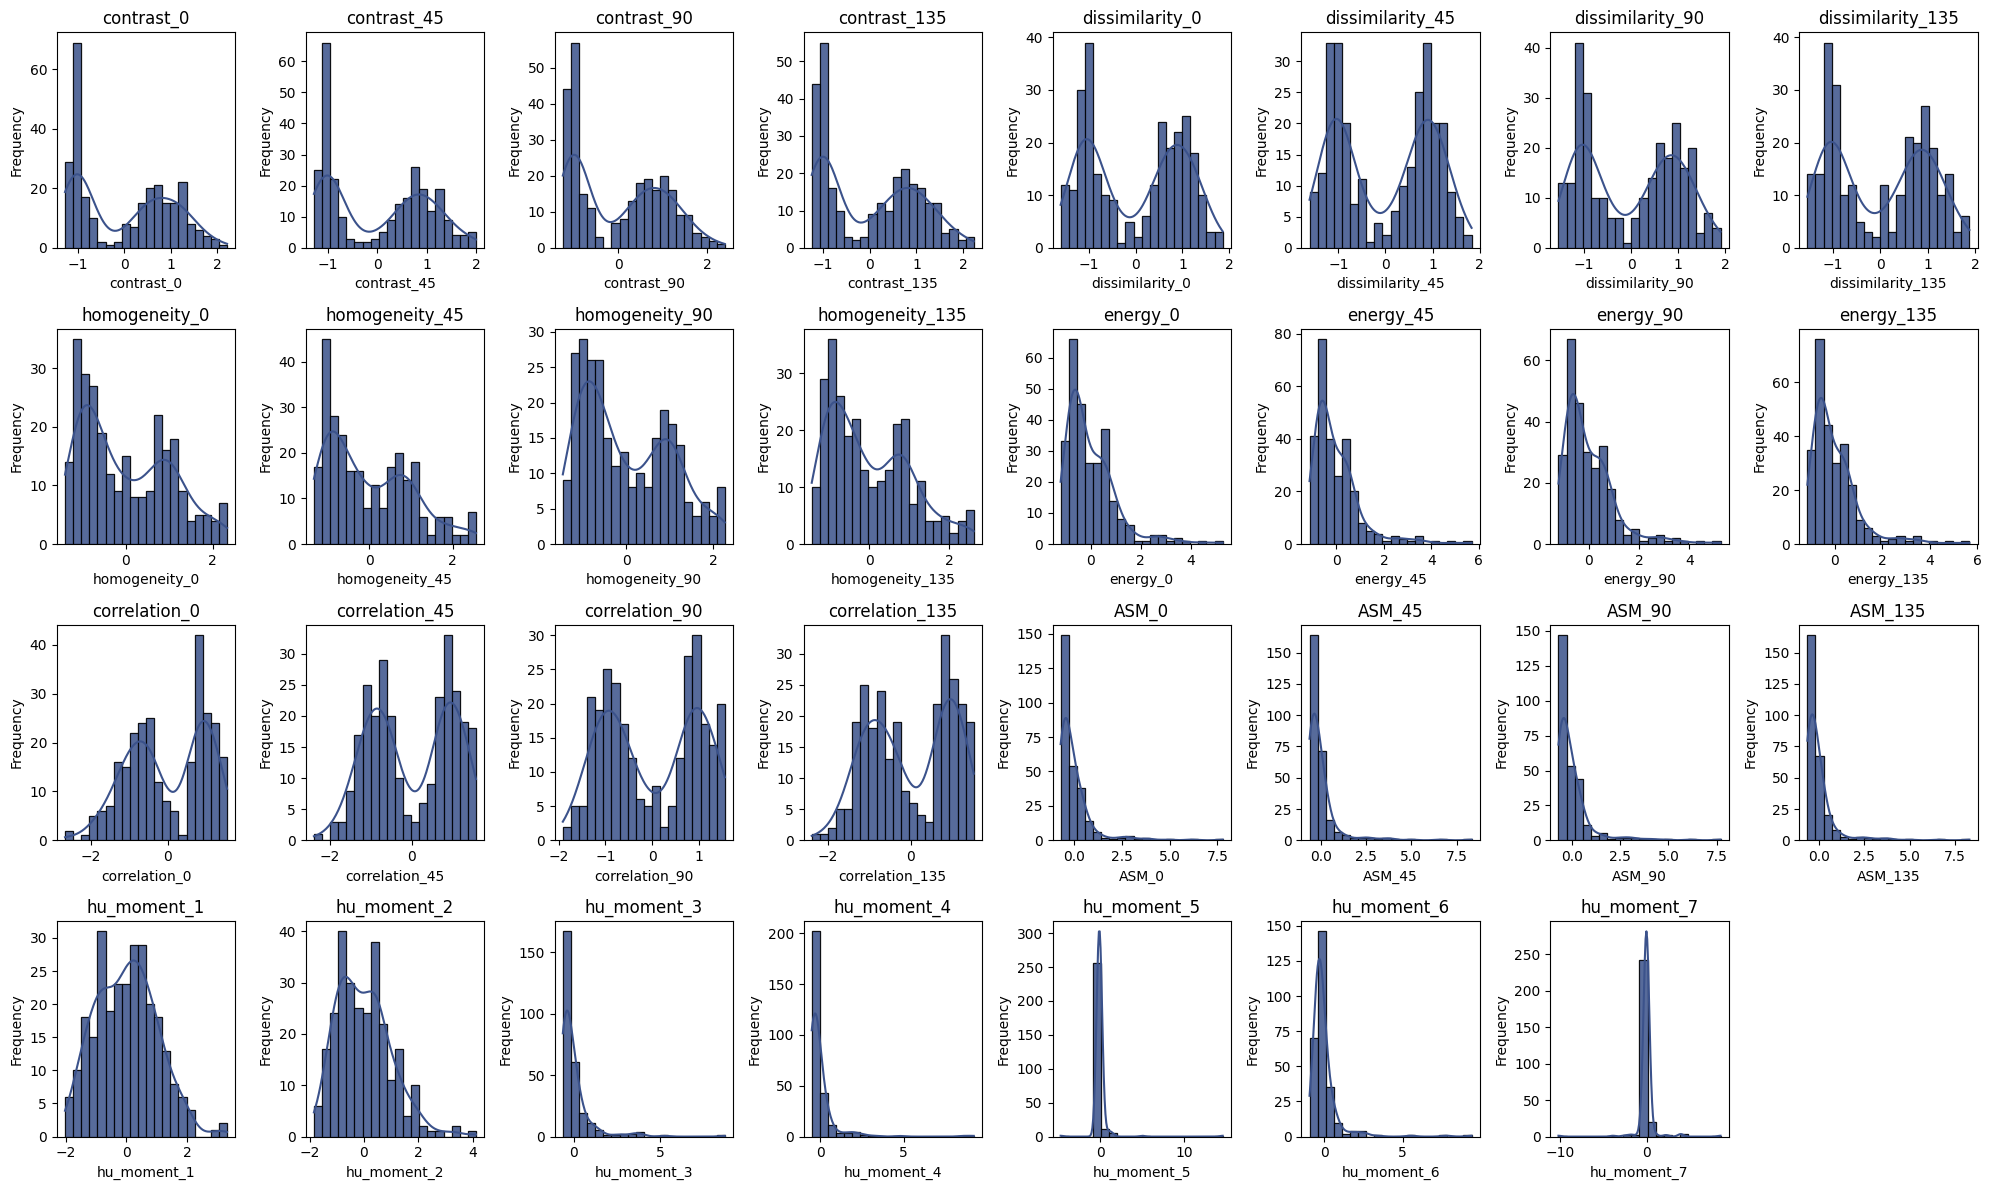

In [30]:
# Histogram

df_features = df_image_features_normalized.drop(columns=['label'])

# Set up subplot for histograms
num_cols = 8 #normal 4
num_rows = (df_features.shape[1] + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 3*num_rows)) #normal 15, 3
axes = axes.flatten() # Flatten axes for easier iteration

# Plot histograms for each feature
for i, col in enumerate(df_features.columns):
    axes[i].hist(df_features[col], bins=20, alpha=0.7, color='#3b528b', edgecolor='black')
    sns.histplot(data=df_features, x=col, kde=True, ax=axes[i], bins=20, color='#3b528b')
    axes[i].set_title(col)
    #axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide unused subplots
for i in range(len(df_features.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

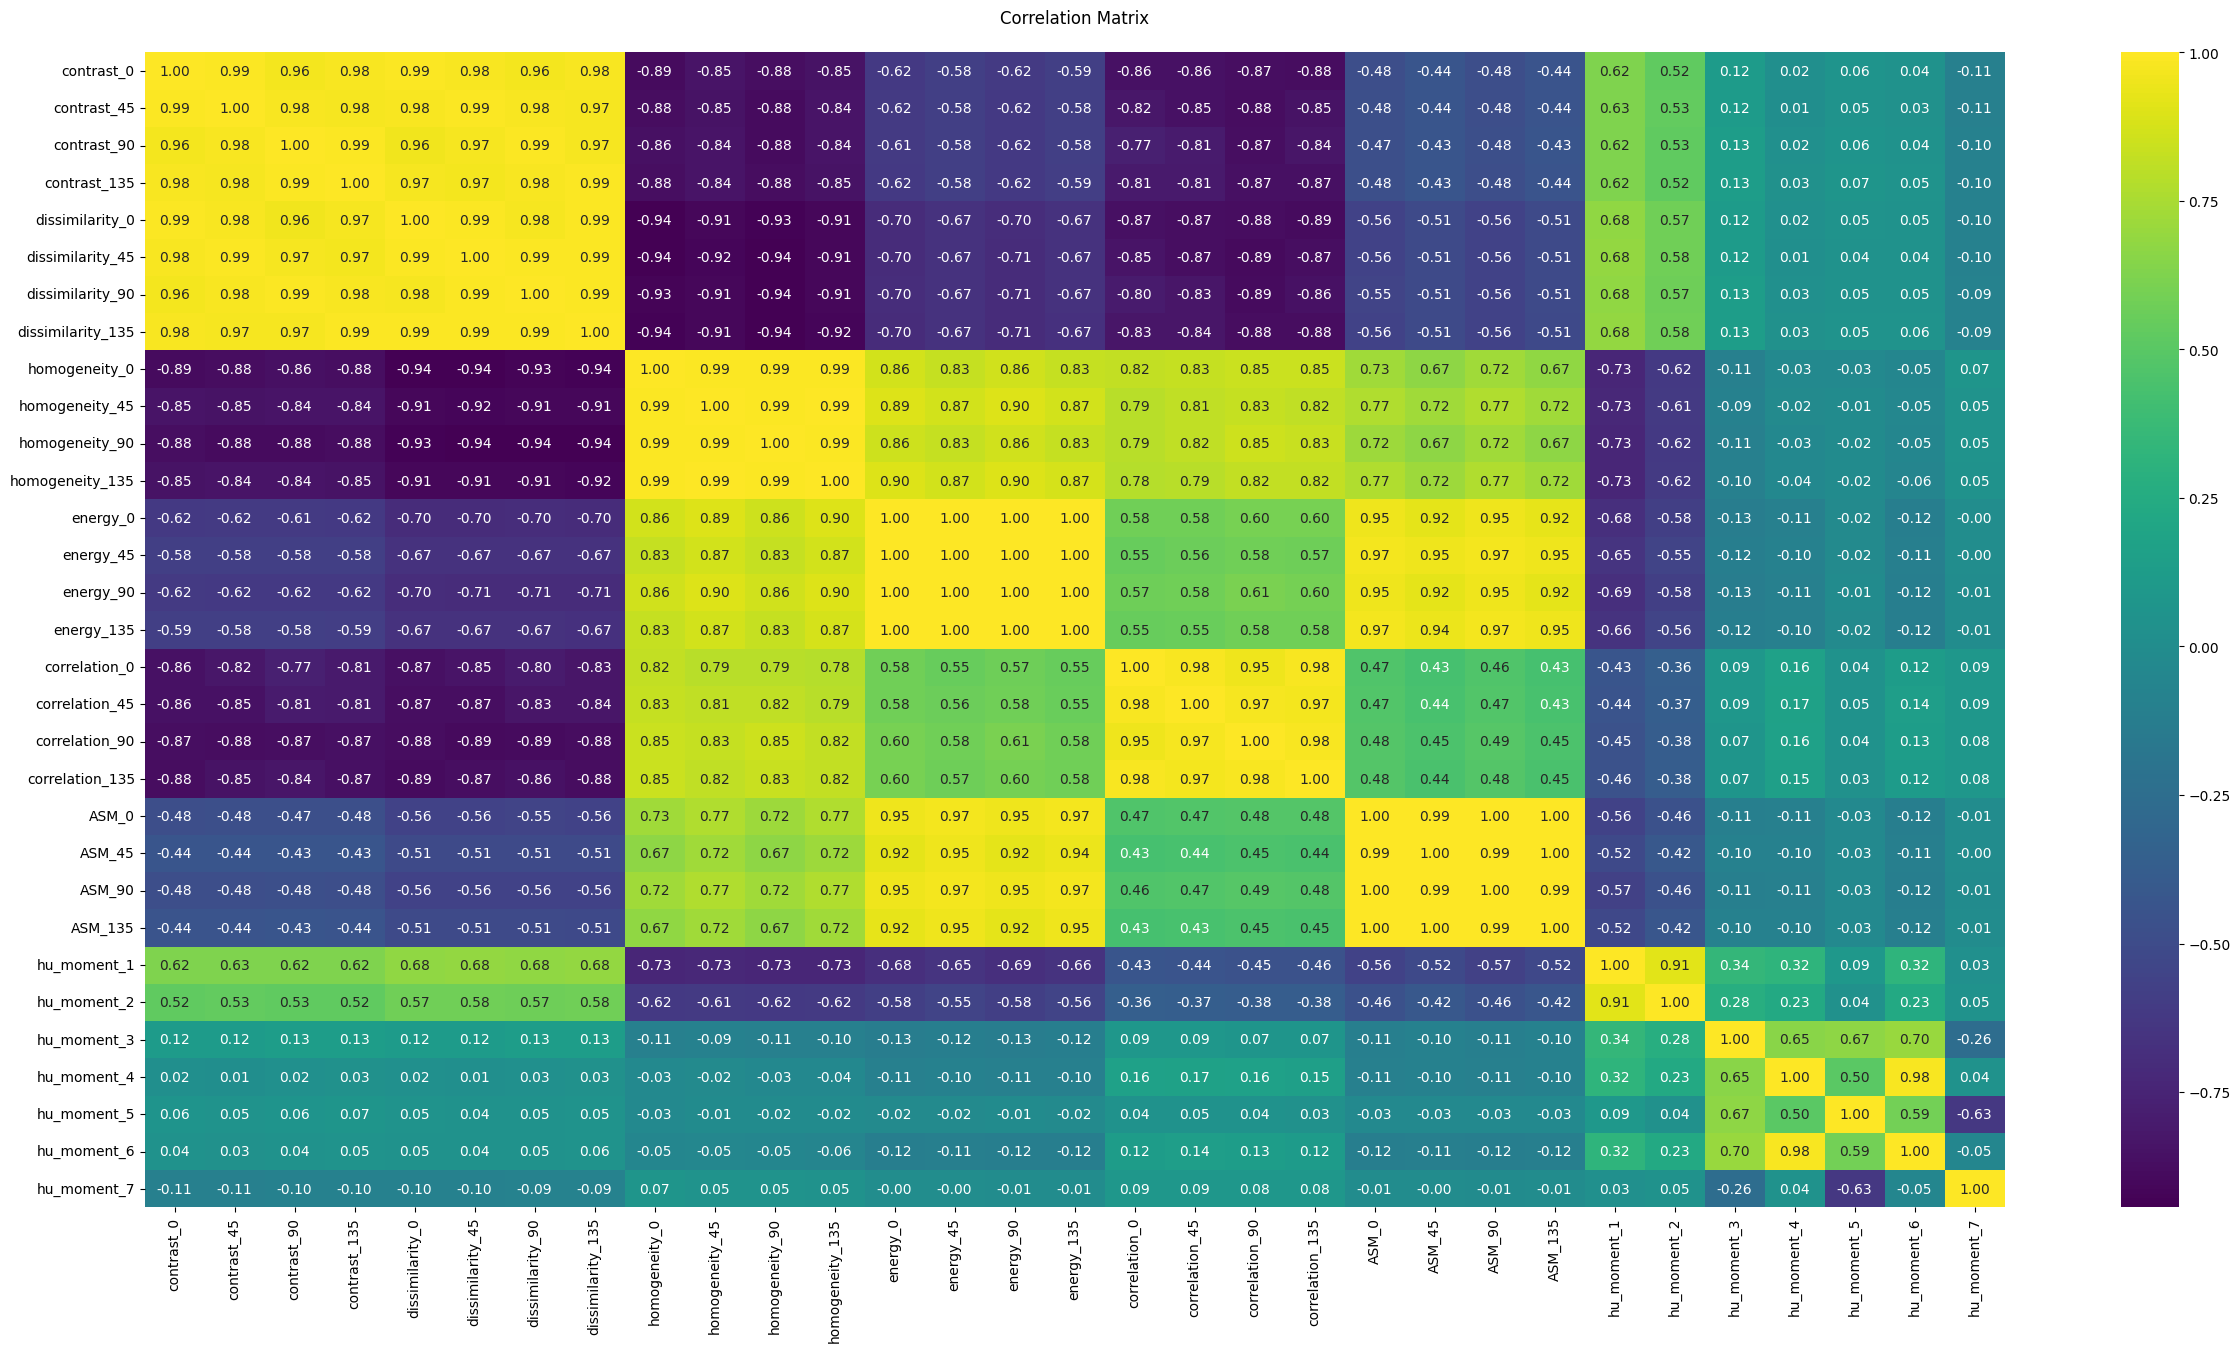

In [9]:
# Correlation matrix

corr_matrix = df_image_features_normalized.drop(['label'], axis=1).corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix\n')
plt.show()

## Classification Model

In [21]:
# Classification model with KFold Cross-validation

# Separate features and labels
X = df_image_features_normalized.drop(columns=['label'])
y = df_image_features_normalized['label'].map({'normal': 0, 'abnormal': 1})

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to hold results
results = []
accuracy_train_list = []
accuracy_test_list = []

# KFold Cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the SVM model
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train, y_train)

    # Predict on train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, zero_division=1)
    recall = recall_score(y_test, y_test_pred, zero_division=1)
    f1 = f1_score(y_test, y_test_pred, zero_division=1)

    # Store accuracy results
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

    # Append results
    for i in range(len(y_test)):
        results.append({
            'fold': fold + 1,
            'true_label': y_test.iloc[i],
            'predicted_label': y_test_pred[i],
            'accuracy_train': accuracy_train,
            'accuracy_test': accuracy_test,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
        })

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Save the DataFrame to CSV
df_results.to_csv("3_results.csv", index=False)

print("\n SVM classification training and testing is complete and store to '3_results.csv'\n")


 SVM classification training and testing is complete and store to '3_results.csv'



In [11]:
# Display accuracy results

for i in range(len(accuracy_train_list)):
    print(f"Fold {i+1} - Train Accuracy: {accuracy_train_list[i]:.4f}, Test Accuracy: {accuracy_test_list[i]:.4f}")

Fold 1 - Train Accuracy: 0.9919, Test Accuracy: 1.0000
Fold 2 - Train Accuracy: 0.9960, Test Accuracy: 0.9643
Fold 3 - Train Accuracy: 0.9960, Test Accuracy: 0.9643
Fold 4 - Train Accuracy: 0.9919, Test Accuracy: 0.9643
Fold 5 - Train Accuracy: 0.9919, Test Accuracy: 1.0000
Fold 6 - Train Accuracy: 0.9919, Test Accuracy: 1.0000
Fold 7 - Train Accuracy: 0.9879, Test Accuracy: 1.0000
Fold 8 - Train Accuracy: 0.9919, Test Accuracy: 0.9630
Fold 9 - Train Accuracy: 0.9919, Test Accuracy: 1.0000
Fold 10 - Train Accuracy: 0.9919, Test Accuracy: 0.9630


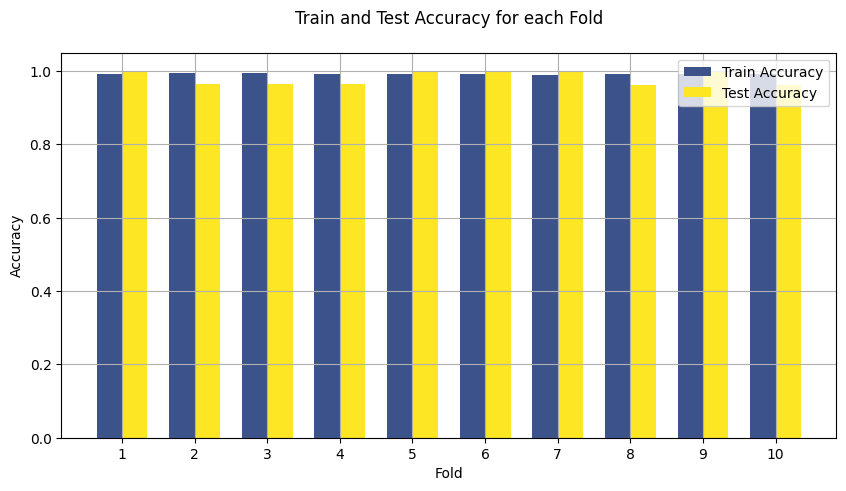

In [12]:
# Plotting the accuracy for train and test sets

plt.figure(figsize=(10, 5))
folds = range(1, 11)
bar_width = 0.35
index = np.arange(len(folds))

# Create bars

plt.bar(index, accuracy_train_list, bar_width, label='Train Accuracy', color='#3b528b')
plt.bar(index + bar_width, accuracy_test_list, bar_width, label='Test Accuracy', color='#fde725')

# Adding labels
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for each Fold\n')
plt.xticks(index + bar_width / 2, folds)
plt.legend()
plt.grid(True)

plt.show()

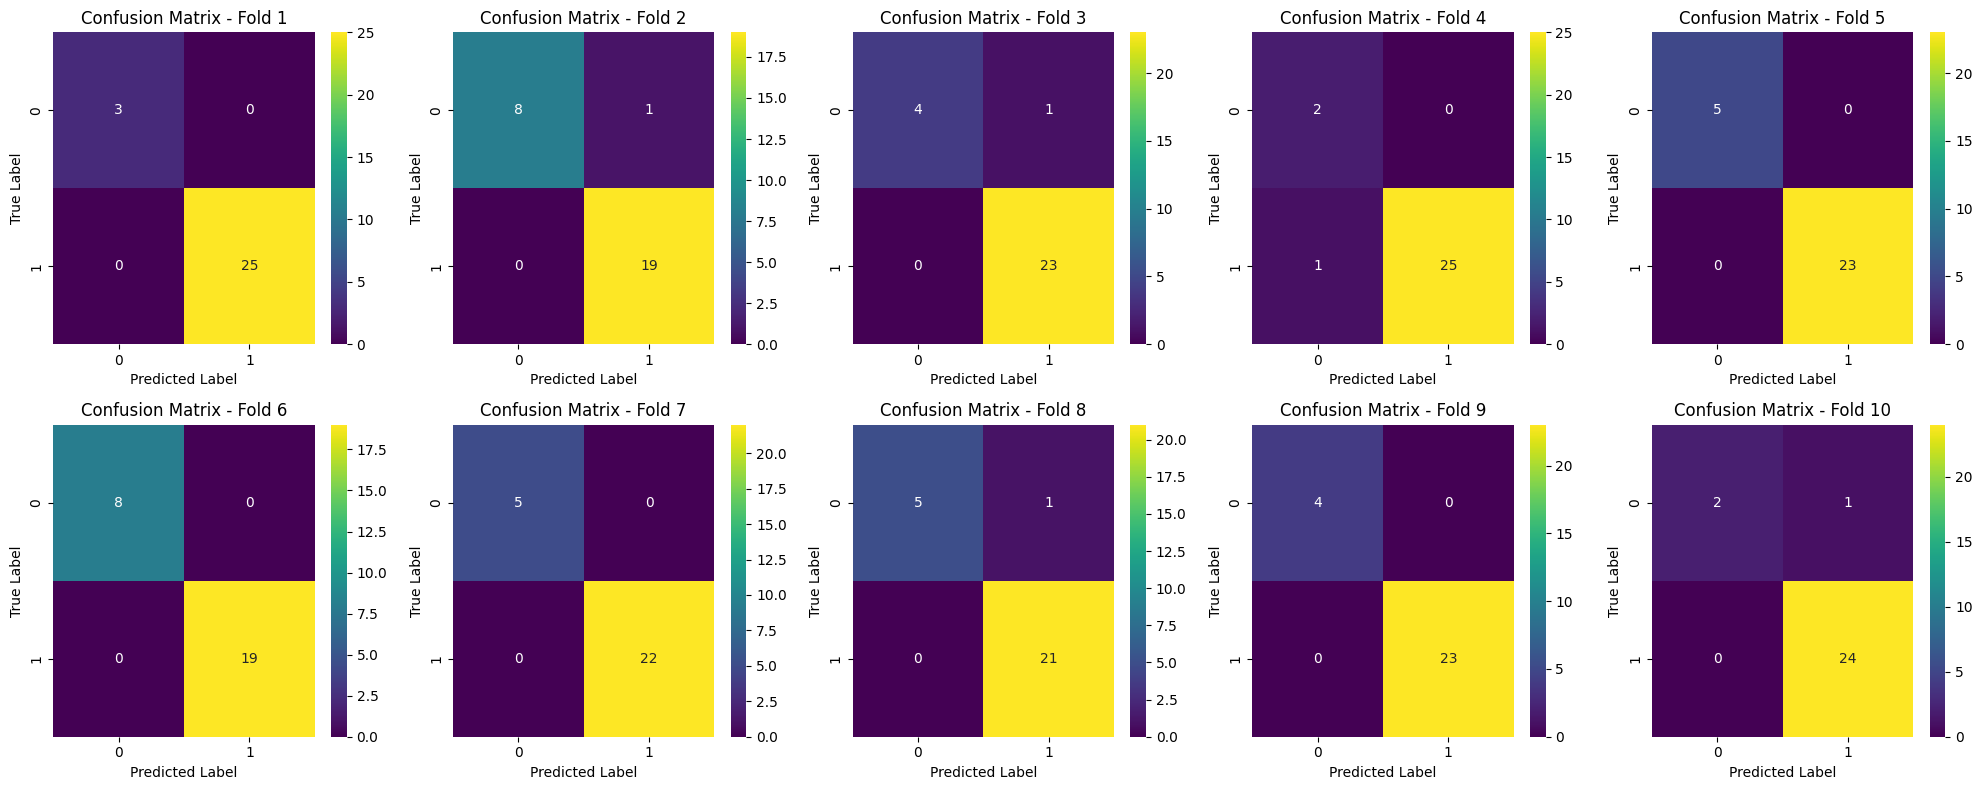

In [23]:
# Confusion matrix for each fold

# Unique folds
folds = df_results['fold'].unique()

# Number of folds
num_folds = len(folds)
cols = 5  # Number of columns
rows = (num_folds // cols) + (num_folds % cols > 0)  # Number of rows

# Set up subplot
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
axes = axes.flatten()  # Flatten to easily index the axes

# Iterate over folds and plot confusion matrix
for i, fold in enumerate(folds):
    fold_data = df_results[df_results['fold'] == fold]
    conf_matrix = confusion_matrix(fold_data['true_label'], fold_data['predicted_label'])
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=axes[i])
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_title(f'Confusion Matrix - Fold {fold}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()